In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns

from jqdatasdk import *
auth('17780620786','xxb19880825')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

auth success 


In [59]:
stocks = list(get_all_securities(['stock']).index)
security_list = stocks[:50]
start_date = '2019-07-05'
end_date = '2019-08-25'

In [60]:
stocks[:10]

['000001.XSHE',
 '000002.XSHE',
 '000004.XSHE',
 '000005.XSHE',
 '000006.XSHE',
 '000007.XSHE',
 '000008.XSHE',
 '000009.XSHE',
 '000010.XSHE',
 '000011.XSHE']

In [79]:
# money_flow_df = get_money_flow(security_list, start_date=start_date, end_date=end_date, fields=None, count=None)
# money_flow_df = money_flow_df.set_index(['date', 'sec_code'])
# price_df = get_price(security_list, start_date=start_date, end_date=end_date, frequency='daily', fields=['close', 'money'], skip_paused=False, fq='pre', count=None)
# close_df = price_df['close']
# money_df =  price_df['money']
#ret_df = (close_df/close_df.shift(1)-1)
money_cols = ['net_amount_main', 'net_amount_xl', 'net_amount_l', 'net_amount_m', 'net_amount_s','money']


In [62]:
money_df.head()

,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,000046.XSHE,000048.XSHE,000049.XSHE,000050.XSHE,000055.XSHE,000056.XSHE,000058.XSHE,000059.XSHE,000060.XSHE,000061.XSHE
2019-07-05,1.037357e+09,1.032280e+09,21330912.83,2.465536e+08,30237716.48,26870208.20,4.373992e+07,39473726.90,15243289.60,53889840.60,...,6.089946e+07,1824898.54,9.920187e+07,3.870481e+08,29039128.83,25860119.32,9474492.31,33526591.72,1.024004e+08,17581941.17
2019-07-08,1.061096e+09,1.147380e+09,14408594.10,1.151768e+08,43943765.35,22579895.00,1.086412e+08,92635960.45,18371636.60,70603191.60,...,1.004853e+08,6087787.62,1.066392e+08,4.921194e+08,43280212.85,32205921.84,19137273.60,62413468.22,1.599152e+08,39061951.48
2019-07-09,6.703917e+08,9.758260e+08,11745949.07,6.989816e+07,21959809.97,15416545.04,6.662031e+07,43730097.16,9764394.56,96364214.92,...,5.612436e+07,3072556.27,5.876201e+07,3.959581e+08,22446831.48,23068643.19,16486722.60,33244910.01,6.781920e+07,23020361.00
2019-07-10,4.870719e+08,5.173363e+08,12704834.10,4.324093e+07,24026606.64,11538757.00,6.693985e+07,42472662.69,17849800.00,59000917.27,...,3.878191e+07,1244084.00,6.841607e+07,6.095975e+08,25127653.65,26941972.20,12122197.59,29601267.31,5.213839e+07,17071125.03
2019-07-11,6.605883e+08,9.378056e+08,38533015.99,3.063849e+07,14483524.00,12829384.12,4.377554e+07,48860367.87,21568820.00,52513822.66,...,4.795395e+07,1353738.00,5.821081e+07,3.624337e+08,22173438.61,20380426.04,14522684.99,37694495.27,6.736920e+07,24971293.90


In [63]:
money_flow_df.head()

change_pct  net_amount_main  net_pct_main  \
date       sec_code                                                 
2019-07-05 000028.XSHE       -0.26         -17.2578       -0.6535   
           000026.XSHE        0.51        -432.1233      -15.8646   
           000025.XSHE        0.10         -25.9904       -0.7506   
           000023.XSHE        0.38         221.6776        9.2017   
           000021.XSHE        0.12        -199.7933       -3.1825   

                        net_amount_xl  net_pct_xl  net_amount_l  net_pct_l  \
date       sec_code                                                          
2019-07-05 000028.XSHE         0.0000      0.0000      -17.2578    -0.6535   
           000026.XSHE      -555.0838    -20.3788      122.9605     4.5143   
           000025.XSHE        -7.9755     -0.2303      -18.0149    -0.5203   
           000023.XSHE        39.5729      1.6426      182.1047     7.5591   
           000021.XSHE       194.4528      3.0974     -394.2461    -6.2799   

                        net_amount_m  net_pct_m  net_amount_s  net_pct_s  
date       sec_code                                                       
2019-07-05 000028.XSHE      152.1665     5.7621     -134.9087    -5.1086  
           000026.XSHE      367.3463    13.4864       64.7770     2.3782  
           000025.XSHE     -195.7980    -5.6546      221.7885     6.4051  
           000023.XSHE     -109.3010    -4.5370     -112.3765    -4.6647  
           000021.XSHE     -246.8620    -3.9322      446.6552     7.1147

In [64]:
price_df.to_frame().head()

close         money
major      minor                           
2019-07-05 000001.XSHE  13.92  1.037357e+09
           000002.XSHE  28.31  1.032280e+09
           000004.XSHE  20.81  2.133091e+07
           000005.XSHE   3.34  2.465536e+08
           000006.XSHE   5.61  3.023772e+07

In [48]:
money_df.head()
money_flow_df.head()

,date,sec_code,change_pct,net_amount_main,net_pct_main,net_amount_xl,net_pct_xl,net_amount_l,net_pct_l,net_amount_m,net_pct_m,net_amount_s,net_pct_s,money,date,sec_code,money
0,2019-05-06,000428.XSHE,-7.31,-475.7829,-20.6998,0.0000,0.0000,-475.7829,-20.6998,-15.1684,-0.6599,490.9512,21.3598,2.298486e+07,2019-05-06,000001.XSHE,2.742409e+09
1,2019-05-06,000005.XSHE,-8.18,-455.0834,-9.5238,-55.9112,-1.1701,-399.1722,-8.3537,-534.6810,-11.1896,989.7644,20.7135,4.778362e+07,2019-05-06,000002.XSHE,1.919849e+09
2,2019-05-06,000403.XSHE,-3.08,-281.5899,-4.9902,-82.1338,-1.4555,-199.4561,-3.5347,285.5523,5.0604,-3.9624,-0.0702,5.642828e+07,2019-05-06,000004.XSHE,5.427393e+07
3,2019-05-06,000402.XSHE,-6.44,-1591.3743,-13.9567,-895.7468,-7.8559,-695.6275,-6.1008,-0.1578,-0.0014,1591.5322,13.9581,1.140221e+08,2019-05-06,000005.XSHE,4.778362e+07
4,2019-05-06,000035.XSHE,-6.82,-288.6683,-4.2734,13.4067,0.1985,-302.0750,-4.4718,301.1870,4.4587,-12.5187,-0.1853,6.755076e+07,2019-05-06,000006.XSHE,1.093931e+08


In [72]:
money_flow_df1 = money_flow_df.reset_index().join(money_df.stack().reset_index(), how='left')
money_flow_df1 =  money_flow_df1.rename(columns={'level_0':'date1', 'level_1':'sec_code1', 0:'money'}).\
        set_index(['date','sec_code'])

In [75]:
money_flow_df1.head()

change_pct  net_amount_main  net_pct_main  \
date       sec_code                                                 
2019-07-05 000028.XSHE       -0.26         -17.2578       -0.6535   
           000026.XSHE        0.51        -432.1233      -15.8646   
           000025.XSHE        0.10         -25.9904       -0.7506   
           000023.XSHE        0.38         221.6776        9.2017   
           000021.XSHE        0.12        -199.7933       -3.1825   

                        net_amount_xl  net_pct_xl  net_amount_l  net_pct_l  \
date       sec_code                                                          
2019-07-05 000028.XSHE         0.0000      0.0000      -17.2578    -0.6535   
           000026.XSHE      -555.0838    -20.3788      122.9605     4.5143   
           000025.XSHE        -7.9755     -0.2303      -18.0149    -0.5203   
           000023.XSHE        39.5729      1.6426      182.1047     7.5591   
           000021.XSHE       194.4528      3.0974     -394.2461    -6.2799   

                        net_amount_m  net_pct_m  net_amount_s  net_pct_s  \
date       sec_code                                                        
2019-07-05 000028.XSHE      152.1665     5.7621     -134.9087    -5.1086   
           000026.XSHE      367.3463    13.4864       64.7770     2.3782   
           000025.XSHE     -195.7980    -5.6546      221.7885     6.4051   
           000023.XSHE     -109.3010    -4.5370     -112.3765    -4.6647   
           000021.XSHE     -246.8620    -3.9322      446.6552     7.1147   

                            date1    sec_code1         money  
date       sec_code                                           
2019-07-05 000028.XSHE 2019-07-05  000001.XSHE  1.037357e+09  
           000026.XSHE 2019-07-05  000002.XSHE  1.032280e+09  
           000025.XSHE 2019-07-05  000004.XSHE  2.133091e+07  
           000023.XSHE 2019-07-05  000005.XSHE  2.465536e+08  
           000021.XSHE 2019-07-05  000006.XSHE  3.023772e+07

In [90]:
rolling_money_df = money_flow_df1[money_cols].groupby('sec_code').apply(lambda df: df.rolling(5).sum()).dropna(how='all')
rolling_money_df['money'] = rolling_money_df['money']/1e4
for col in money_cols[:-1]:
    rolling_money_df[col] = rolling_money_df[col]/rolling_money_df['money']

In [91]:
rolling_money_df.head()

net_amount_main  net_amount_xl  net_amount_l  \
date       sec_code                                                    
2019-07-11 000027.XSHE        -0.039219      -0.005299     -0.033920   
           000037.XSHE         0.014409      -0.007626      0.022035   
           000059.XSHE        -0.108125      -0.012298     -0.095827   
           000016.XSHE        -0.131798       0.036593     -0.168391   
           000058.XSHE        -0.006903      -0.002649     -0.004254   

                        net_amount_m  net_amount_s         money  
date       sec_code                                               
2019-07-11 000027.XSHE      0.031106      0.008113  22033.448310  
           000037.XSHE     -0.065151      0.050742  21380.877548  
           000059.XSHE      0.000156      0.107969  21296.306746  
           000016.XSHE     -0.030907      0.162705   9808.333409  
           000058.XSHE     -0.003413      0.010316  93900.962392

In [82]:
# money_flow_df = money_flow_df.join(money_df.stack().reset_index().rename(columns={'level_0':'date', 'level_1':'sec_code', 0:'money'}).set_index(['date', 'sec_code']), how='left')
# rolling_money_df = money_flow_df[money_cols].groupby('sec_code').apply(lambda df: df.rolling(5).sum()).dropna(how='all')
# rolling_money_df['money'] = rolling_money_df['money']/1e4
# for col in money_cols[:-1]:
#     rolling_money_df[col] = rolling_money_df[col]/rolling_money_df['money']

In [39]:
rolling_money_df.head()

net_amount_main  net_amount_xl  net_amount_l  \
date       sec_code                                                    
2010-01-08 000150.XSHE        -0.019838      -0.003473     -0.016365   
           000422.XSHE         0.033640       0.070963     -0.037323   
           000402.XSHE        -0.097556      -0.045785     -0.051771   
           000021.XSHE         0.087410       0.021178      0.066232   
           000404.XSHE        -0.026871      -0.012309     -0.014562   

                        net_amount_m  net_amount_s        money  
date       sec_code                                              
2010-01-08 000150.XSHE      0.000828      0.019010   23863.6989  
           000422.XSHE     -0.020314     -0.013327   82843.9710  
           000402.XSHE      0.010671      0.086885  297403.1300  
           000021.XSHE     -0.024489     -0.062921  108950.5602  
           000404.XSHE     -0.018743      0.045614   24498.9424

In [85]:
money_df.head()

,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,000046.XSHE,000048.XSHE,000049.XSHE,000050.XSHE,000055.XSHE,000056.XSHE,000058.XSHE,000059.XSHE,000060.XSHE,000061.XSHE
2019-07-05,1.037357e+09,1.032280e+09,21330912.83,2.465536e+08,30237716.48,26870208.20,4.373992e+07,39473726.90,15243289.60,53889840.60,...,6.089946e+07,1824898.54,9.920187e+07,3.870481e+08,29039128.83,25860119.32,9474492.31,33526591.72,1.024004e+08,17581941.17
2019-07-08,1.061096e+09,1.147380e+09,14408594.10,1.151768e+08,43943765.35,22579895.00,1.086412e+08,92635960.45,18371636.60,70603191.60,...,1.004853e+08,6087787.62,1.066392e+08,4.921194e+08,43280212.85,32205921.84,19137273.60,62413468.22,1.599152e+08,39061951.48
2019-07-09,6.703917e+08,9.758260e+08,11745949.07,6.989816e+07,21959809.97,15416545.04,6.662031e+07,43730097.16,9764394.56,96364214.92,...,5.612436e+07,3072556.27,5.876201e+07,3.959581e+08,22446831.48,23068643.19,16486722.60,33244910.01,6.781920e+07,23020361.00
2019-07-10,4.870719e+08,5.173363e+08,12704834.10,4.324093e+07,24026606.64,11538757.00,6.693985e+07,42472662.69,17849800.00,59000917.27,...,3.878191e+07,1244084.00,6.841607e+07,6.095975e+08,25127653.65,26941972.20,12122197.59,29601267.31,5.213839e+07,17071125.03
2019-07-11,6.605883e+08,9.378056e+08,38533015.99,3.063849e+07,14483524.00,12829384.12,4.377554e+07,48860367.87,21568820.00,52513822.66,...,4.795395e+07,1353738.00,5.821081e+07,3.624337e+08,22173438.61,20380426.04,14522684.99,37694495.27,6.736920e+07,24971293.90


In [96]:
rolling_money_df.reset_index().groupby('sec_code').head()

,date,sec_code,net_amount_main,net_amount_xl,net_amount_l,net_amount_m,net_amount_s,money
0,2019-07-11,000027.XSHE,-0.039219,-5.299030e-03,-0.033920,0.031106,0.008113,22033.448310
1,2019-07-11,000037.XSHE,0.014409,-7.625875e-03,0.022035,-0.065151,0.050742,21380.877548
2,2019-07-11,000059.XSHE,-0.108125,-1.229838e-02,-0.095827,0.000156,0.107969,21296.306746
3,2019-07-11,000016.XSHE,-0.131798,3.659267e-02,-0.168391,-0.030907,0.162705,9808.333409
4,2019-07-11,000058.XSHE,-0.006903,-2.649219e-03,-0.004254,-0.003413,0.010316,93900.962392
5,2019-07-11,000010.XSHE,0.003121,2.408346e-03,0.000713,-0.003781,0.000660,127154.220254
6,2019-07-11,000026.XSHE,-0.007124,-4.614769e-03,-0.002509,0.003936,0.003188,120284.203431
7,2019-07-11,000019.XSHE,-0.009720,-4.669648e-03,-0.005050,-0.004150,0.013870,126117.598380
8,2019-07-11,000011.XSHE,0.044655,1.080041e-02,0.033855,0.036880,-0.081535,23028.105985
9,2019-07-11,000009.XSHE,-0.076786,-6.151726e-03,-0.070635,0.010839,0.065947,50621.747876


In [87]:
# money_df.reset_index()[money_df.reset_index().sec_code == '000001.XSHE']#.loc[('', '000001.XSHE'),:]##.loc[[:,'000001.XSHE'],]

In [97]:
rolling_money_df.reset_index().groupby('sec_code').\
            apply(lambda df: df.set_index('date')/df.set_index('date').shift(abs(-5))-1)

net_amount_main  net_amount_xl  net_amount_l  \
sec_code    date                                                       
000001.XSHE 2019-07-11              NaN            NaN           NaN   
            2019-07-12              NaN            NaN           NaN   
            2019-07-15              NaN            NaN           NaN   
            2019-07-16              NaN            NaN           NaN   
            2019-07-17              NaN            NaN           NaN   
            2019-07-18        -1.381918  -1.637181e+00     -1.036452   
            2019-07-19        -1.331063  -1.216252e+00     -1.059026   
            2019-07-22        -1.264331  -1.173430e+00     -0.779610   
            2019-07-23        -1.147252  -1.070790e+00     -0.586719   
            2019-07-24        -0.363222  -1.031555e-01    -11.129526   
            2019-07-25         1.306071   1.595676e+00     -5.545149   
            2019-07-26        -2.424134  -2.253779e+00     -0.945295   
            2019-07-29        -3.803130  -3.863236e+00     -3.550913   
            2019-07-30       -12.416653  -2.057068e+01     -2.177629   
            2019-07-31         5.746170   3.954479e+00     -0.820938   
            2019-08-01        -2.057783  -1.742541e+00      2.201222   
            2019-08-02        -6.105080  -5.873902e+00    -52.099917   
            2019-08-05        -3.137517  -3.245711e+00     -2.627930   
            2019-08-06        -2.888207  -2.433471e+00    -12.377701   
            2019-08-07        -2.089393  -1.755666e+00     31.755845   
            2019-08-08        -1.568767  -1.511446e+00     -1.748400   
            2019-08-09        -1.685780  -1.441721e+00     -6.317198   
            2019-08-12        -2.636519  -2.511674e+00     -3.447674   
            2019-08-13        -2.651074  -2.428075e+00     -3.237374   
            2019-08-14        -3.486331  -2.953766e+00     -4.732335   
            2019-08-15         1.292295  -4.182531e-01      4.955575   
            2019-08-16        -1.151118  -1.521259e+00     -0.567603   
            2019-08-19        -2.932372  -3.634913e+00     -0.113271   
            2019-08-20        -2.626798  -3.255670e+00     -1.571455   
            2019-08-21        -1.473613  -1.785099e+00     -1.092129   
...                                 ...            ...           ...   
000061.XSHE 2019-07-15              NaN            NaN           NaN   
            2019-07-16              NaN            NaN           NaN   
            2019-07-17              NaN            NaN           NaN   
            2019-07-18        -0.475163  -1.313763e+00     -0.504080   
            2019-07-19        -0.409501  -1.296769e+00     -0.447812   
            2019-07-22         0.316916  -7.114240e+00     -0.023742   
            2019-07-23         0.103986  -7.171251e+00     -0.274279   
            2019-07-24         0.000114           -inf     -0.332362   
            2019-07-25        -0.858638   2.565367e+01     -1.437050   
            2019-07-26        -0.659393   6.543092e+00     -0.826533   
            2019-07-29        -1.152434  -1.312780e+00     -1.106398   
            2019-07-30        -1.216149  -1.310742e+00     -1.174327   
            2019-07-31        -1.364544  -9.881753e-01     -1.551971   
            2019-08-01        -0.999431  -9.714388e-01     -0.962187   
            2019-08-02         2.445425   4.543937e+00      0.327828   
            2019-08-05        -4.490349  -7.952071e+00     -1.568639   
            2019-08-06        -5.486249  -7.821806e+00     -3.645570   
            2019-08-07        -4.166768   1.320279e+02     -2.713803   
            2019-08-08     21240.858676   5.215880e+01    -53.149379   
            2019-08-09        -0.264470  -7.847942e-01      1.927740   
            2019-08-12         0.056725  -7.994626e-01      8.891418   
            2019-08-13        -0.379461  -1.000000e+00      0.881601   
            2019-08-14        -0.818894  -1.892318e+00      0.06

In [99]:
for window in range(-5, 0):
    for money_col in money_cols:
        col = money_col+str(window)
        temp_df = rolling_money_df.reset_index()\
                        .groupby('sec_code')\
                        .apply(lambda df: df.set_index('date')/df.set_index('date').shift(abs(window))-1)\
                        .rename(columns={money_col: col})\
                        .reset_index()\
                        .set_index(['date', 'sec_code'])
        rolling_money_df[col] = temp_df[col]
for col in money_cols:
    rolling_money_df[col+'_ret'+'-5'] = rolling_money_df[col]/rolling_money_df[col+'-5']-1

In [107]:
rolling_money_df.tail()

net_amount_main  net_amount_xl  net_amount_l  \
date       sec_code                                                    
2019-08-23 000007.XSHE         0.007949      -0.012895      0.020843   
           000037.XSHE        -0.004036       0.003239     -0.007275   
           000058.XSHE         0.162247       0.193571     -0.031324   
           000061.XSHE         0.001834       0.000869      0.000966   
           000001.XSHE        -1.802717      -1.630941     -0.171775   

                        net_amount_m  net_amount_s          money  \
date       sec_code                                                 
2019-08-23 000007.XSHE      0.006586     -0.014535   46172.136871   
           000037.XSHE      0.003655      0.000381  147612.721801   
           000058.XSHE     -0.075736     -0.086512   41049.316739   
           000061.XSHE     -0.003018      0.001184  265807.043188   
           000001.XSHE      0.622889      1.179828   68223.148955   

                        net_amount_main-5  net_amount_xl-5  net_amount_l-5  \
date       sec_code                                                          
2019-08-23 000007.XSHE          -1.623370     2.359714e+00       -3.338480   
           000037.XSHE          -0.118430    -6.477232e-01       -0.471798   
           000058.XSHE        -978.665051     7.965770e+18      187.749800   
           000061.XSHE          -1.302610    -8.802804e-01       -1.072508   
           000001.XSHE           3.732016     1.028426e+00       -1.406010   

                        net_amount_m-5  ...  net_amount_l-1  net_amount_m-1  \
date       sec_code                     ...                                   
2019-08-23 000007.XSHE       -0.309336  ...       -5.421112       -0.383747   
           000037.XSHE       -0.848981  ...       -0.145188       -0.158135   
           000058.XSHE     -215.141512  ...        2.020689        0.871200   
           000061.XSHE       -0.967977  ...        0.446457        0.225026   
           000001.XSHE        0.298360  ...        1.443543       -0.151480   

                        net_amount_s-1   money-1  net_amount_main_ret-5  \
date       sec_code                                                       
2019-08-23 000007.XSHE       -5.507638 -0.553564              -1.004896   
           000037.XSHE       -0.884634  0.068945              -0.965924   
           000058.XSHE        0.806070  0.007975              -1.000166   
           000061.XSHE       -0.169778  0.030536              -1.001408   
           000001.XSHE       -0.072827  0.040311              -1.483041   

                        net_amount_xl_ret-5  net_amount_l_ret-5  \
date       sec_code                                               
2019-08-23 000007.XSHE            -1.005464           -1.006243   
           000037.XSHE            -1.005001           -0.984581   
           000058.XSHE            -1.000000           -1.000167   
           000061.XSHE            -1.000987           -1.000900   
           000001.XSHE            -2.585862           -0.877828   

                        net_amount_m_ret-5  net_amount_s_ret-5    money_ret-5  
date       sec_code                                                            
2019-08-23 000007.XSHE           -1.021291           -0.997367 -136771.235733  
           000037.XSHE           -1.004305           -1.000374   15465.781880  
           000058.XSHE           -0.999648           -1.000188  -50503.546234  
           000061.XSHE           -0.996882           -1.001198    8948.107271  
           000001.XSHE            1.087707           -1.091156   12133.915978  

[5 rows x 42 columns]

In [106]:
close_df.head()

,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,000046.XSHE,000048.XSHE,000049.XSHE,000050.XSHE,000055.XSHE,000056.XSHE,000058.XSHE,000059.XSHE,000060.XSHE,000061.XSHE
2019-07-05,13.92,28.31,20.81,3.34,5.61,6.67,3.81,4.79,3.68,9.98,...,5.55,19.02,26.19,14.32,5.22,4.43,5.69,6.57,4.54,5.51
2019-07-08,13.59,28.02,20.30,3.12,5.45,6.58,3.66,4.58,3.67,10.19,...,5.17,19.01,25.17,13.58,5.02,4.27,5.44,6.36,4.37,5.33
2019-07-09,13.59,28.02,20.14,3.05,5.43,6.40,3.71,4.61,3.65,10.48,...,5.27,18.71,25.32,13.73,5.02,4.23,5.41,6.37,4.38,5.27
2019-07-10,13.56,28.04,19.81,2.98,5.38,6.32,3.66,4.55,3.67,10.29,...,5.24,18.67,24.83,14.02,4.94,4.15,5.31,6.31,4.40,5.22
2019-07-11,13.54,28.08,21.18,2.98,5.40,6.32,3.63,4.54,3.63,10.48,...,5.15,18.70,25.01,13.82,4.96,4.11,5.32,6.38,4.42,5.17


In [110]:
close_df.stack().reset_index().rename(columns={'level_0': 'date',
                                               'level_1': 'sec_code',
                                               0: 'close'}).head()

,date,sec_code,close
0,2019-07-05,000001.XSHE,13.92
1,2019-07-05,000002.XSHE,28.31
2,2019-07-05,000004.XSHE,20.81
3,2019-07-05,000005.XSHE,3.34
4,2019-07-05,000006.XSHE,5.61


In [114]:
stacked_df.reset_index()\
                        .groupby('sec_code')\
                        .apply(lambda df: df.set_index('date').shift(-window)/df.set_index('date')-1)\
                        .rename(columns={'close': col})\
                        .reset_index()\
                        .set_index(['date', 'sec_code']).head()

,,money
date,sec_code,
2019-07-05,000001.XSHE,NaN
2019-07-08,000001.XSHE,0.024283
2019-07-09,000001.XSHE,0.000000
2019-07-10,000001.XSHE,0.002212
2019-07-11,000001.XSHE,0.001477


In [115]:
stacked_df = close_df.stack()\
                     .reset_index()\
                     .rename(columns={'level_0': 'date',
                                      'level_1': 'sec_code',
                                      0: 'close'})\
                     .set_index(['date', 'sec_code'])

for window in range(-5, 11):
    if window > 0:
        col = 'ret+'+str(window)
        temp_df = stacked_df.reset_index()\
                        .groupby('sec_code')\
                        .apply(lambda df: df.set_index('date').shift(-window)/df.set_index('date')-1)\
                        .rename(columns={'close': col})\
                        .reset_index()\
                        .set_index(['date', 'sec_code'])
    elif window < 0:
        col = 'ret'+str(window)
        temp_df = stacked_df.reset_index()\
                        .groupby('sec_code')\
                        .apply(lambda df: df.set_index('date')/df.set_index('date').shift(abs(window))-1)\
                        .rename(columns={'close': col})\
                        .reset_index()\
                        .set_index(['date', 'sec_code'])
    stacked_df[col] = temp_df[col]
    
for col in rolling_money_df.columns:
    if col not in stacked_df.columns:
        stacked_df[col] = rolling_money_df[col]

stacked_df = stacked_df.dropna()

In [116]:
stacked_df.head()

close     ret-5     ret-4     ret-3     ret-2  \
date       sec_code                                                     
2019-07-18 000001.XSHE  13.67  0.009601 -0.031870 -0.023571 -0.005818   
           000002.XSHE  28.93  0.030271  0.015088  0.003121  0.001038   
           000004.XSHE  20.23 -0.044854 -0.021287 -0.003939 -0.005897   
           000005.XSHE   3.00  0.006711  0.016949 -0.019608 -0.019608   
           000006.XSHE   5.35 -0.009259 -0.011091 -0.011091 -0.018349   

                           ret-1     ret+1     ret+2     ret+3     ret+4  ...  \
date       sec_code                                                       ...   
2019-07-18 000001.XSHE -0.001461  0.023409  0.013168  0.006584  0.015362  ...   
           000002.XSHE -0.001036  0.020394  0.033529 -0.003111 -0.004148  ...   
           000004.XSHE -0.005897  0.005932 -0.031142 -0.045971 -0.035591  ...   
           000005.XSHE -0.016393  0.010000 -0.020000 -0.013333 -0.003333  ...   
           000006.XSHE -0.018349  0.026168 -0.009346 -0.001869  0.026168  ...   

                        net_amount_l-1  net_amount_m-1  net_amount_s-1  \
date       sec_code                                                      
2019-07-18 000001.XSHE        0.766443       -0.155449        0.330722   
           000002.XSHE       -0.491040       -0.103672       -0.106906   
           000004.XSHE       -1.519572       -1.120439       -1.257184   
           000005.XSHE       -0.936958       -0.875606       -0.888593   
           000006.XSHE       -0.914112       -0.136994        0.292892   

                         money-1  net_amount_main_ret-5  net_amount_xl_ret-5  \
date       sec_code                                                            
2019-07-18 000001.XSHE -0.117132              -1.464639            -1.376289   
           000002.XSHE  0.101423              -1.501349            -1.367469   
           000004.XSHE -0.039795              -0.999178            -1.000000   
           000005.XSHE  6.364911              -0.997430            -1.001210   
           000006.XSHE  0.008892              -0.999354            -0.999495   

                        net_amount_l_ret-5  net_amount_m_ret-5  \
date       sec_code                                              
2019-07-18 000001.XSHE           -1.025125           -0.770002   
           000002.XSHE           -1.131379           -1.139560   
           000004.XSHE           -0.999162           -0.999736   
           000005.XSHE           -0.996179           -0.992436   
           000006.XSHE           -1.000082           -0.998886   

                        net_amount_s_ret-5    money_ret-5  
date       sec_code                                        
2019-07-18 000001.XSHE           -0.766700   81336.765305  
           000002.XSHE           -0.489575    8716.774405  
           000004.XSHE           -1.000638  217831.210603  
           000005.XSHE           -1.009907   13601.438262  
           000006.XSHE           -1.000891   84792.052611  

[5 rows x 58 columns]

In [101]:
#rolling_money_df[['net_amount_main-1']].apply(lambda x: x.clip(np.percentile(x, 0.05), np.percentile(x, 0.95)))

In [55]:
stacked_df.corr()[['ret+1', 'ret+2', 'ret+3', 'ret+4', 'ret+5', 'net_amount_main', 'net_amount_xl', 'net_amount_l','net_amount_m', 'net_amount_s']]

,ret+1,ret+2,ret+3,ret+4,ret+5,net_amount_main,net_amount_xl,net_amount_l,net_amount_m,net_amount_s
close,-0.012075,-0.018072,-0.022371,-0.026082,-0.029554,0.007672,-0.021933,0.030190,0.051108,-0.039947
ret-5,0.038428,0.025213,0.025110,0.024940,0.023666,0.480821,0.404570,0.332787,-0.109085,-0.493803
ret-4,0.054602,0.042451,0.035254,0.031888,0.028918,0.486928,0.414196,0.333081,-0.117262,-0.495873
ret-3,0.054596,0.047773,0.044597,0.035466,0.029139,0.430126,0.370743,0.289962,-0.110229,-0.433934
ret-2,0.057389,0.044506,0.047868,0.042602,0.029760,0.362383,0.316716,0.240471,-0.099694,-0.361320
ret-1,0.088450,0.057616,0.055182,0.055198,0.043826,0.272269,0.242614,0.176591,-0.083670,-0.265854
ret+1,1.000000,0.736175,0.592153,0.515705,0.465316,0.042857,0.048231,0.018995,-0.013465,-0.042004
ret+2,0.736175,1.000000,0.836835,0.721519,0.649614,0.040070,0.045733,0.017201,-0.011202,-0.040156
ret+3,0.592153,0.836835,1.000000,0.881896,0.788248,0.038817,0.042932,0.017864,-0.008951,-0.040084
ret+4,0.515705,0.721519,0.881896,1.000000,0.907685,0.037290,0.041035,0.017344,-0.007598,-0.039166


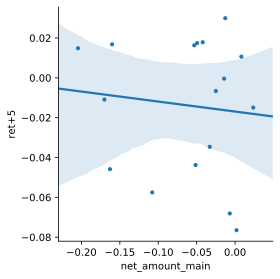

In [117]:
grouped_df = stacked_df.reset_index().groupby('date').mean()
sns.lmplot(x="net_amount_main", y="ret+5", data=grouped_df, height=4, robust=True,
           scatter_kws={"s": 10, "alpha": 1})
# plt.xlim(-1, 1)

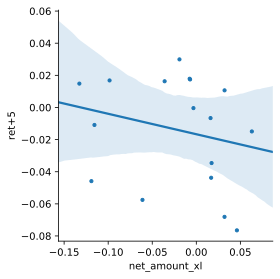

In [118]:
sns.lmplot(x="net_amount_xl", y="ret+5", data=grouped_df, height=4, robust=True,
           scatter_kws={"s": 10, "alpha": 1})


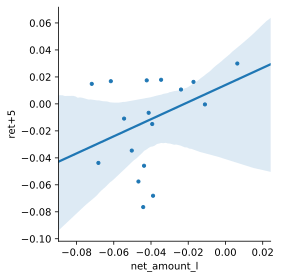

In [119]:
sns.lmplot(x="net_amount_l", y="ret+5", data=grouped_df, height=4, robust=True,
           scatter_kws={"s": 10, "alpha": 1})


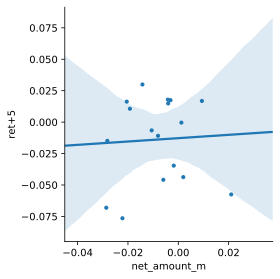

In [120]:
sns.lmplot(x="net_amount_m", y="ret+5", data=grouped_df, height=4,  robust=True,
           scatter_kws={"s": 10, "alpha": 1})


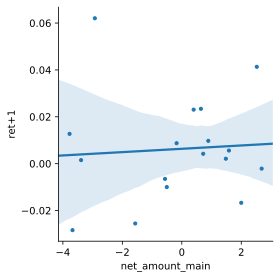

In [121]:
plot_df = stacked_df.query('sec_code == "000001.XSHE"').reset_index()
sns.lmplot(x="net_amount_main", y="ret+1", data=plot_df, height=4,
           scatter_kws={"s": 10, "alpha": 1})

* 大单当日占比与历史收益率有显著正相关关系
* 与未来收益率关系似乎不大

In [61]:
# sns.lmplot(x="net_pct_main", y="ret+1", col='col', data=grouped_df, height=4, col_wrap=2, 
#            scatter_kws={"s": 50, "alpha": 1})

In [122]:
df = group_money_df.stack().reset_index().rename(columns={'date':'date', 
                                                          'level_1': 'mfl',
                                                          0: 'value'})

NameError: name 'group_money_df' is not defined

In [71]:
close_df.stack().reset_index().rename(columns={'level_0': 'date',
                                               'level_1': 'sec_code',
                                               0: 'close'}).dtypes

date        datetime64[ns]
sec_code            object
close              float64
dtype: object

In [123]:
df = close_df.stack().reset_index().rename(columns={'level_0': 'date',
                                               'level_1': 'sec_code',
                                               0: 'close'})
merged_df = df.set_index(['date', 'sec_code']).join(money_df.set_index(['date', 'sec_code'])).reset_index()[['date', 'sec_code'] + money_cols + ['close']].dropna()

KeyError: 'date'

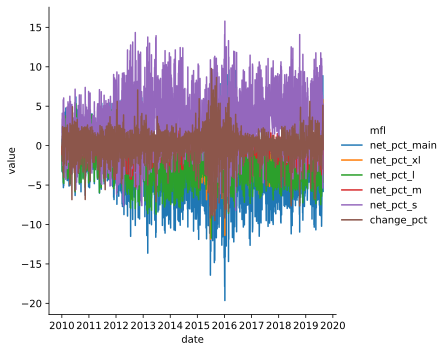

In [42]:

sns.relplot(x="date", y="value",
            hue="mfl", facet_kws=dict(sharex=False),
            kind="line",data=df)

In [82]:
stacked_df

close     ret-5     ret-4     ret-3     ret-2  \
date       sec_code                                                     
2010-01-11 000001.XSHE   7.44 -0.047375 -0.029987 -0.013263 -0.002681   
           000002.XSHE   7.60 -0.040404 -0.018088 -0.018088 -0.010417   
           000005.XSHE   5.82 -0.028381 -0.061290 -0.042763 -0.001715   
           000006.XSHE   3.32 -0.037681 -0.008955 -0.011905 -0.003003   
           000007.XSHE   4.71  0.019481 -0.016701 -0.016701  0.012903   
           000009.XSHE   4.82  0.019027  0.045553  0.047826  0.027719   
           000010.XSHE   2.88 -0.023729 -0.006897 -0.017065  0.024911   
           000011.XSHE   9.28 -0.015907  0.015317  0.013100  0.036872   
           000012.XSHE   5.98 -0.065625 -0.050794 -0.078582 -0.027642   
           000014.XSHE  13.97 -0.056081 -0.023760 -0.033887 -0.018271   
           000016.XSHE   3.25 -0.081921 -0.081921 -0.024024  0.006192   
           000018.XSHE   2.37  0.053333  0.030435  0.025974  0.053333   
           000019.XSHE   4.91 -0.031558 -0.041016 -0.050290 -0.002033   
           000020.XSHE  10.39 -0.065647 -0.085387 -0.055455 -0.021657   
           000021.XSHE   8.45  0.064232  0.040640  0.047088  0.034272   
           000022.XSHE  11.49 -0.005195 -0.009483 -0.029561  0.000871   
           000023.XSHE   9.25 -0.022199 -0.032427 -0.059003 -0.054192   
           000024.XSHE  15.04 -0.058824 -0.014417 -0.020833 -0.018917   
           000025.XSHE   7.88  0.020725  0.019405  0.008963  0.034121   
           000026.XSHE   7.92 -0.014925 -0.008761 -0.056019 -0.008761   
           000027.XSHE   6.06 -0.003289 -0.003289 -0.001647  0.021922   
           000028.XSHE  25.09 -0.042732 -0.067979 -0.082297 -0.039801   
           000029.XSHE   7.14  0.004219  0.021459  0.017094  0.021459   
           000030.XSHE   5.04  0.039175  0.018182  0.030675  0.052192   
           000031.XSHE  10.09 -0.016569  0.003980  0.002982 -0.010784   
           000032.XSHE   7.04  0.020290  0.000000  0.023256  0.065053   
           000033.XSHE   6.43  0.158559  0.162749  0.114385  0.045528   
           000035.XSHE   3.34 -0.011834 -0.002985  0.003003  0.012121   
           000036.XSHE   3.98 -0.056872 -0.047847 -0.036320  0.007595   
           000037.XSHE   7.15 -0.004178 -0.019204 -0.024557  0.002805   
...                       ...       ...       ...       ...       ...   
2019-08-09 000156.XSHE   9.03 -0.073846 -0.071942 -0.024838 -0.012035   
           000157.XSHE   5.37 -0.061189 -0.034173 -0.016484 -0.012868   
           000158.XSHE   4.78 -0.087786 -0.070039 -0.028455 -0.028455   
           000159.XSHE   6.10 -0.075758 -0.071537 -0.009740 -0.012945   
           000166.XSHE   4.55 -0.033970 -0.023605 -0.010870 -0.002193   
           000301.XSHE   4.99 -0.040385 -0.017717  0.000000 -0.002000   
           000333.XSHE  51.22 -0.029005 -0.007364 -0.005630  0.003723   
           000338.XSHE  11.11 -0.052856 -0.024583  0.001803  0.006341   
           000400.XSHE   7.76 -0.071770 -0.061669 -0.015228 -0.008940   
           000401.XSHE  15.60 -0.077469 -0.042945 -0.046455 -0.021330   
           000402.XSHE   7.16 -0.027174 -0.005556  0.005618  0.007032   
           000403.XSHE  27.00 -0.001110  0.006336 -0.002217  0.004838   
           000404.XSHE   3.83 -0.056650 -0.047264 -0.015424 -0.007772   
           000407.XSHE   3.31 -0.056980 -0.040580  0.003030  0.003030   
           000408.XSHE   9.10 -0.125000 -0.082661 -0.031915 -0.022556   
           000409.XSHE   4.64  0.049774  0.000000 -0.008547 -0.002151   
           000410.XSHE   5.23 -0.082456 -0.059353 -0.054250 -0.022430   
           000411.XSHE  11.59 -0.060016 -0.053878 -0.007705 -0.009402   
           000413.XSHE   4.37 -0.070213 -0.052061 -0.011312 -0.006818   
           000415.XSHE   3.41 -0.065753 -0.036723 -0.014451 -0.008721   
           000416.XSHE   5.44 -0.115447 -0.096346 -0.050611 -0.030303   
           000417.XSHE   4.39 -0.071882 -0.051836 -0.028761 -0.017897   
         

In [124]:
def get_event_perf(close_df, event_fn, event_window=20):
    event_df = None
    for symbol in close_df.columns:
        try:
            temp_df = pd.DataFrame()
            df = close_df[symbol]
            event_idx = event_fn(symbol)
            for window in range(-event_window//2, event_window+1):
                col = str(window)
                if window >= 0:
                    temp_df[col] = (df.shift(-window)/df-1)[event_idx].fillna(0)
                else:
                    temp_df[col] = (df/df.shift(-window)-1)[event_idx].fillna(0)

            if event_df is None:
                event_df = temp_df
            else:
                event_df = pd.concat([event_df, temp_df], ignore_index=True, sort=False)
        except:
            continue
    event_df = event_df.dropna().mean()
    return event_df

In [125]:
def plot_event_analysis(event_df, title='Event analysis'):
    x = event_df.index.map(lambda x: int(x))
    y = event_df.values
    plt.figure(figsize=(12,5))
    plt.plot(x, y)
    plt.vlines(0, -0.5, 0.5)
    plt.hlines(0.1, x.min(), x.max(), 'c', '--')
    plt.ylim(event_df.min(), event_df.max())
    plt.title(title)
    plt.show()

In [131]:
#000406.XSHE


event_df.head(20)

-5    0.071651
-4    0.055132
-3    0.044154
-2    0.028343
-1    0.014294
0     0.000000
1     0.002700
2     0.002143
3    -0.003071
4    -0.007806
5    -0.011533
6    -0.016341
7    -0.013201
8    -0.008063
9     0.003198
10    0.022324
dtype: float64

In [134]:
stacked_df.unstack()['net_amount_main'].head()

sec_code,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,000056.XSHE,000058.XSHE,000059.XSHE,000060.XSHE,000061.XSHE,000017.XSHE,000020.XSHE,000032.XSHE,000026.XSHE,000048.XSHE
date,,,,,,,,,,,,,,,,,,,,,
2019-07-18,0.642094,0.564679,-0.000641,-0.002557,-0.000406,-0.016252,-0.099127,-0.133240,0.006005,-0.067285,...,0.013107,-0.015693,0.004031,-0.161956,-0.016145,NaN,NaN,NaN,NaN,NaN
2019-07-19,-0.505624,0.796580,-0.000039,0.000580,0.001361,-0.017251,-0.074696,-0.049749,0.000671,0.076033,...,0.013725,NaN,0.020093,-0.006771,-0.014900,0.004743,NaN,NaN,NaN,NaN
2019-07-22,-0.565303,0.213641,-0.000775,-0.007119,-0.009314,-0.015933,-0.175078,-0.061448,0.000279,-0.010582,...,0.006616,NaN,-0.025072,-0.022779,-0.036713,0.001344,NaN,NaN,NaN,NaN
2019-07-23,-0.175110,-0.308477,-0.001871,-0.007116,-0.034889,NaN,-0.193160,-0.011191,0.000185,0.013273,...,0.005576,NaN,-0.044652,-0.018412,-0.028556,0.010732,NaN,NaN,NaN,NaN
2019-07-24,0.398010,-0.498180,-0.005549,-0.005874,-0.001751,NaN,-0.045892,0.031324,0.000022,0.035942,...,0.002354,-0.001116,-0.052645,-0.018944,-0.024192,0.026468,0.000481,NaN,NaN,NaN


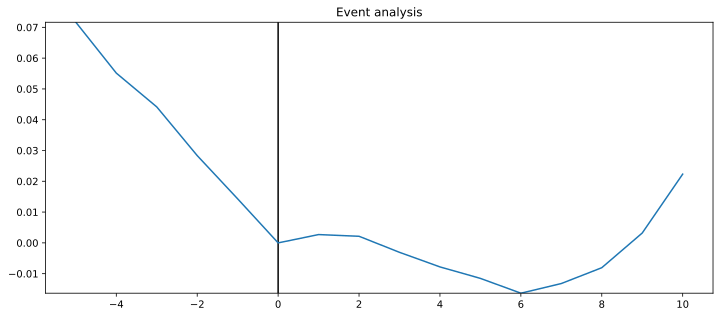

In [130]:
event_fn = lambda s: stacked_df.unstack()['net_amount_main'][stacked_df.unstack()['net_amount_main'][s] > 0.1].index
event_df = get_event_perf(close_df, event_fn, event_window=10)
plot_event_analysis(event_df)

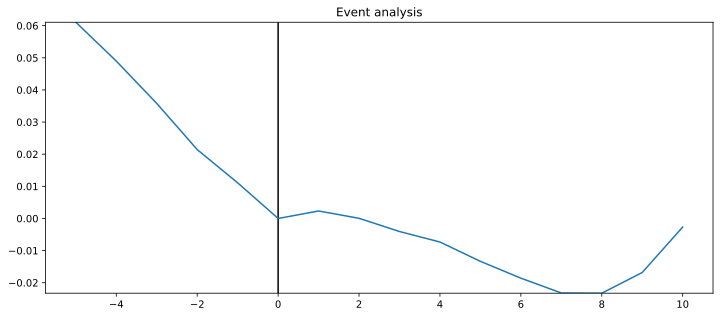

In [127]:
event_fn = lambda s: stacked_df.unstack()['net_amount_xl'][stacked_df.unstack()['net_amount_xl'][s] > 0.05].index
event_df = get_event_perf(close_df, event_fn, event_window=10)
plot_event_analysis(event_df)

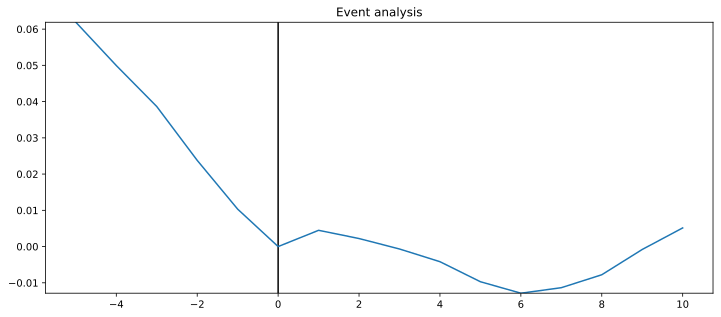

In [128]:
event_fn = lambda s: stacked_df.unstack()['net_amount_s'][stacked_df.unstack()['net_amount_s'][s] < -0.05].index
event_df = get_event_perf(close_df, event_fn, event_window=10)
plot_event_analysis(event_df)

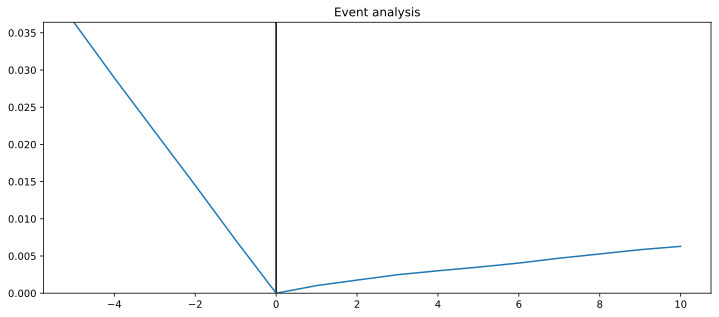

In [338]:
event_fn = lambda s: close_df[close_df[s] > close_df[s].shift(10)].index
event_df = get_event_perf(close_df, event_fn, event_window=10)
plot_event_analysis(event_df)

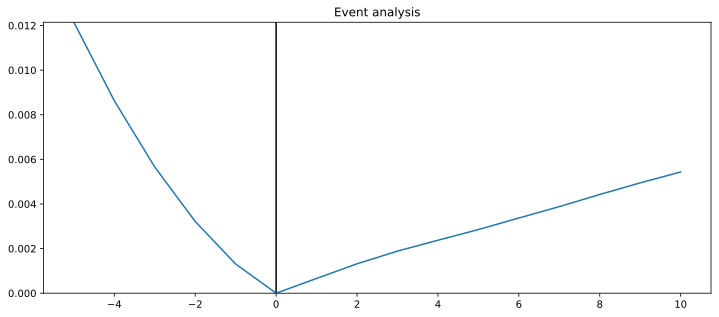

In [340]:
event_fn = lambda s: close_df[close_df[s].rolling(10).mean() > close_df[s].rolling(40).mean()].index
event_df = get_event_perf(close_df, event_fn, event_window=10)
plot_event_analysis(event_df)